In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn import svm



In [ ]:
from google.colab import files
uploaded = files.upload()
#water_potability=pd.read_csv("water_potability.csv")

Saving water_potability.csv to water_potability.csv


In [ ]:
water_potability=pd.read_csv("water_potability.csv")
water_potability

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [ ]:
water_potability.head(15)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
8,NaN,118.988579,14285.583854,7.804174,268.646941,389.375566,12.706049,53.928846,3.595017,0
9,11.180284,227.231469,25484.508491,9.077200,404.041635,563.885481,17.927806,71.976601,4.370562,0


In [ ]:
water_potability.tail(15)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3261,3.629922,244.187392,24856.633209,6.618071,366.967873,442.076337,13.302880,59.489294,4.754826,1
3262,8.378108,198.511213,28474.202580,6.477057,319.477187,499.866994,15.389083,35.221200,4.524693,1
3263,6.923636,260.593154,24792.525623,5.501164,332.232177,607.773567,15.483027,51.535867,4.013339,1
3264,5.893103,239.269481,20526.666156,6.349561,341.256362,403.617560,18.963707,63.846319,4.390702,1
3265,8.197353,203.105091,27701.794055,6.472914,328.886838,444.612724,14.250875,62.906205,3.361833,1
3266,8.372910,169.087052,14622.745494,7.547984,NaN,464.525552,11.083027,38.435151,4.906358,1
3267,8.989900,215.047358,15921.412018,6.297312,312.931022,390.410231,9.899115,55.069304,4.613843,1
3268,6.702547,207.321086,17246.920347,7.708117,304.510230,329.266002,16.217303,28.878601,3.442983,1
3269,11.491011,94.812545,37188.826022,9.263166,258.930600,439.893618,16.172755,41.558501,4.369264,1
3270,6.069616,186.659040,26138.780191,7.747547,345.700257,415.886955,12.067620,60.419921,3.669712,1


In [ ]:
water_potability.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [ ]:
water_potability.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [ ]:
water_potability.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

Let's replace the missing values of the variables ('ph', 'Sulfate', 'Trihalomethanes') with it's mean valuess.

In [ ]:
water_potability.fillna(water_potability[['ph','Sulfate','Trihalomethanes']].mean(),inplace=True)

In [ ]:
water_potability.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [ ]:
water_potability.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.469956,32.879761,8768.570828,1.583085,36.142612,80.824064,3.308162,15.769881,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.277673,176.850538,15666.690297,6.127421,317.094638,365.734414,12.065801,56.647656,3.439711,0.000000
50%,7.080795,196.967627,20927.833607,7.130299,333.775777,421.884968,14.218338,66.396293,3.955028,0.000000
75%,7.870050,216.667456,27332.762127,8.114887,350.385756,481.792304,16.557652,76.666609,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [ ]:
#Correlation between different variables
water_potability.corr(method='pearson')

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,1.000000,0.075833,-0.081884,-0.031811,0.014403,0.017192,0.040061,0.002994,-0.036222,-0.003287
Hardness,0.075833,1.000000,-0.046899,-0.030054,-0.092766,-0.023915,0.003610,-0.012690,-0.014449,-0.013837
Solids,-0.081884,-0.046899,1.000000,-0.070148,-0.149840,0.013831,0.010242,-0.008875,0.019546,0.033743
Chloramines,-0.031811,-0.030054,-0.070148,1.000000,0.023791,-0.020486,-0.012653,0.016627,0.002363,0.023779
Sulfate,0.014403,-0.092766,-0.149840,0.023791,1.000000,-0.014059,0.026909,-0.025605,-0.009790,-0.020619
Conductivity,0.017192,-0.023915,0.013831,-0.020486,-0.014059,1.000000,0.020966,0.001255,0.005798,-0.008128
Organic_carbon,0.040061,0.003610,0.010242,-0.012653,0.026909,0.020966,1.000000,-0.012976,-0.027308,-0.030001
Trihalomethanes,0.002994,-0.012690,-0.008875,0.016627,-0.025605,0.001255,-0.012976,1.000000,-0.021502,0.006960
Turbidity,-0.036222,-0.014449,0.019546,0.002363,-0.009790,0.005798,-0.027308,-0.021502,1.000000,0.001581
Potability,-0.003287,-0.013837,0.033743,0.023779,-0.020619,-0.008128,-0.030001,0.006960,0.001581,1.000000


Let's visualize different correlations and relationships between different variables.

Text(0.5, 1.0, 'Correlation Matrix of Features')

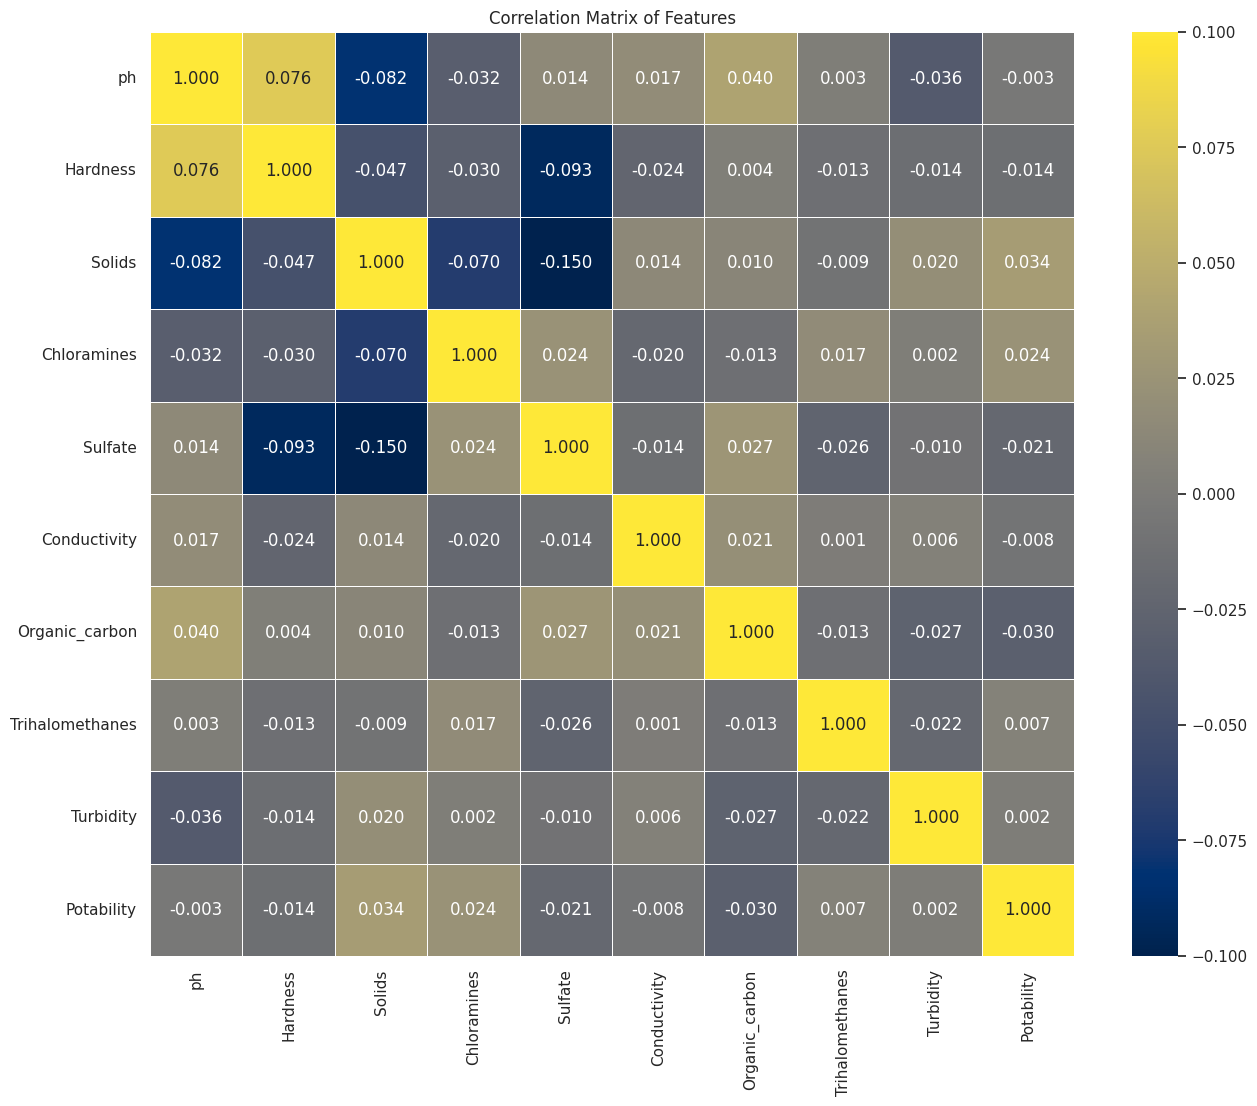

In [ ]:
#Corrleation heatmap of features (variables)
plt.figure(figsize=(15,12))
sns.set_theme(style='darkgrid')
plot=sns.heatmap(water_potability.corr('pearson'), cmap='cividis', vmin=-.1, vmax=.1, center=0, annot=True,
            fmt='.3f', square=True, linewidth=.5)
plot.set_title("Correlation Matrix of Features")

Let's take a closer look between two different variables using joint plot and how the target variable; that is, the potability is distributed within the features.

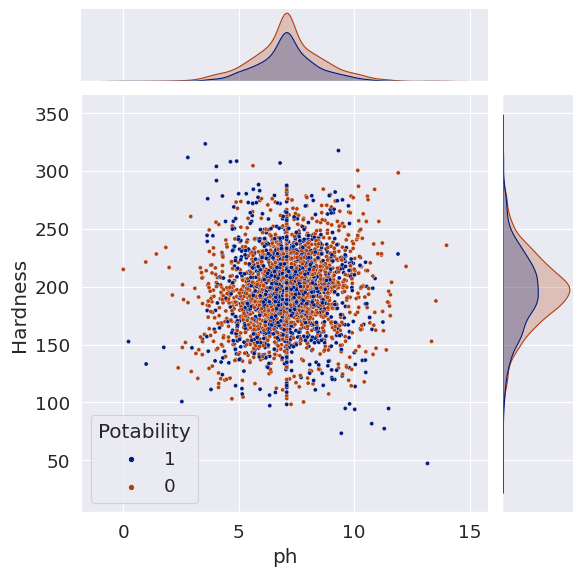

In [ ]:
sns.set_theme(context='paper', style='darkgrid', palette='dark', font_scale=1.5, rc={'lines.markersize':3})
plot=sns.jointplot(data=water_potability, x='ph', y='Hardness', hue='Potability', hue_order=[1,0], kind='scatter')

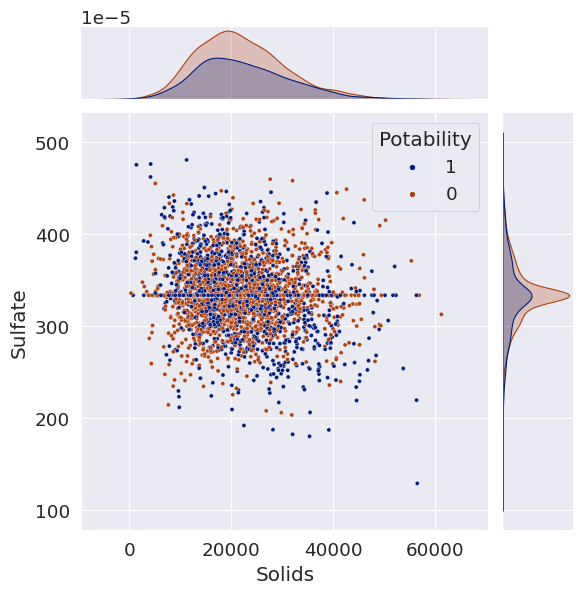

In [ ]:
sns.set_theme(context='paper', style='darkgrid', palette='dark', font_scale=1.5, rc={'lines.markersize':3})
plot=sns.jointplot(data=water_potability, x='Solids', y='Sulfate', hue='Potability', hue_order=[1,0])

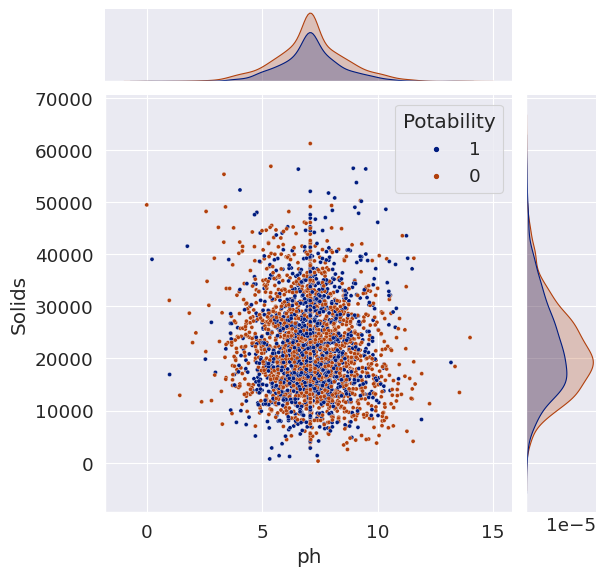

In [ ]:
sns.set_theme(context='paper', style='darkgrid', palette='dark', font_scale=1.5, rc={'lines.markersize':3})
sns.jointplot(data=water_potability, x='ph', y='Solids', hue='Potability', hue_order=[1,0])

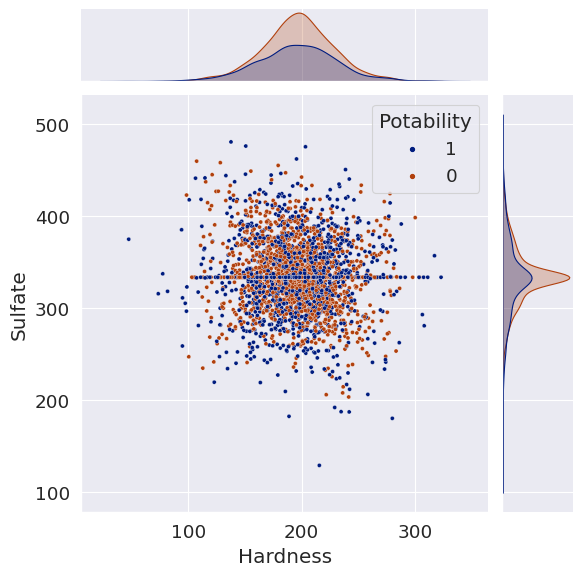

In [ ]:
sns.set_theme(context='paper', style='darkgrid', palette='dark', font_scale=1.5, rc={'lines.markersize':3})
sns.jointplot(data=water_potability, x='Hardness', y='Sulfate', hue='Potability', hue_order=[1,0])

To summarize from the following plots and correlation matrix readings, all variables and features have no linear relationship and they most likely do not affect each other.

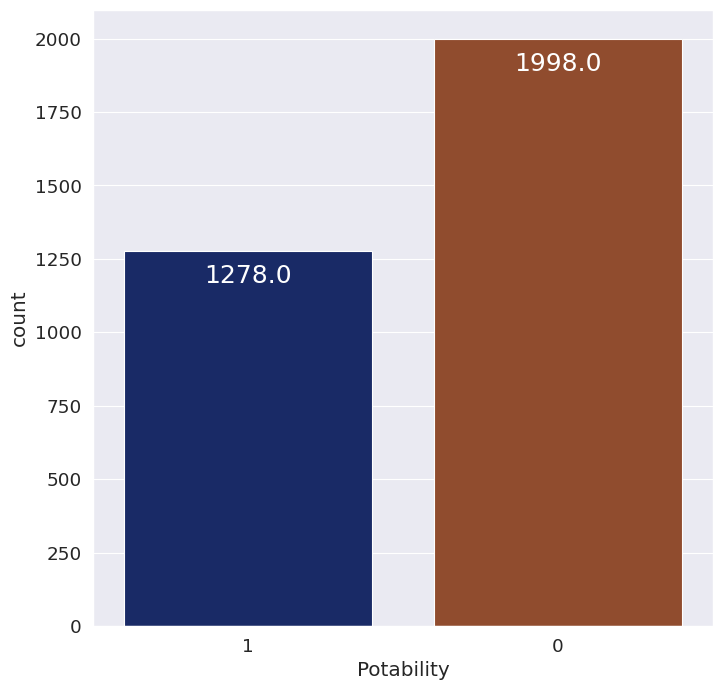

In [ ]:
plt.figure(figsize=(8,8))
sns.set_theme(context='paper', style='darkgrid', palette='dark', font_scale=1.5)
plot=sns.countplot(data=water_potability, x='Potability', order=[1,0], saturation=0.6)
for p in plot.patches:
    plot.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()+50), ha='center', va='top', color='white', size=18)

In our dataset, we have 1998 un-potable water readings and 1278 potable water

We can extend our search for corrleated variables or features using P-value. The P-value is the probability value that the correlation between these two variables is statistically significant

In [ ]:
#P-value between Hardness and pH
corr_hardness_ph, p_value = stats.pearsonr(water_potability['ph'], water_potability['Hardness'])
print("Corrlation value is: ", round(corr_hardness_ph,3),  "The P-value for Hardness and pH is: ", round(p_value,5))

Corrlation value is:  0.076 The P-value for Hardness and pH is:  1e-05


In [ ]:
#P-value between Sulfate and Solids
corr_sulfate_solids, p_value = stats.pearsonr(water_potability['Solids'], water_potability['Sulfate'])
print("Correlation value is: ", round(corr_sulfate_solids,3), "The P-value for Solids and Sulfate is: ", round(p_value,5))

Correlation value is:  -0.15 The P-value for Solids and Sulfate is:  0.0


Let us begin analysis of machine learning models and implementing classification.
Since our aim is to predict potable(1) or non-potable(0) water using the dataset; therefore, we need to have
our target variable "Potability" and our features "pH", "Hardness", "Solids" and etc.

In [ ]:
#splitting the target variable 'Potability' from the dataset
x=water_potability.iloc[:, :-1]
y=water_potability.iloc[:, -1]

In [ ]:
#Using train_test_split, we can split the data for training and testing
xtrain, xtest, ytrain, ytest = train_test_split(x, y, train_size=0.75, random_state=0)


It is important to scale the features with the same level, because different features measured at different scale level do not contribute equally.
https://towardsdatascience.com/how-and-why-to-standardize-your-data-996926c2c832#:~:text=Why%20to%20standardize%20before,prior%20to%20model%20fitting.


In [ ]:
# Normalization on training set
sc=StandardScaler()
xtrain_norm=sc.fit(xtrain).transform(xtrain.astype(float))

Let us find the best classification model, using Github, stackoverflow and find the suitable models for binary classification

https://github.com/sorenwacker/Tensorflow-binary-classification

In [ ]:
#Training the K-Nearest Neighbor on training set
classifier = KNeighborsClassifier(n_neighbors = 4).fit(xtrain_norm, ytrain)
classifier

KNeighborsClassifier(n_neighbors=4)

In [ ]:
#Training the Support Vector Machine on training set
clf = svm.SVC(kernel='rbf')
clf.fit(xtrain_norm, ytrain)

SVC()

Testing on test set

In [ ]:
# Normalization on test set
xtest_norm = sc.fit(xtest).transform(xtest.astype(float))

Testing result prediction

In [ ]:
prediction_outcome = clf.predict(xtest_norm)
prediction_outcome[0:10]

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 0])

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           0       0.67      0.92      0.78       502
           1       0.69      0.27      0.39       317

    accuracy                           0.67       819
   macro avg       0.68      0.60      0.58       819
weighted avg       0.68      0.67      0.63       819

Confusion matrix, without normalization
[[464  38]
 [231  86]]


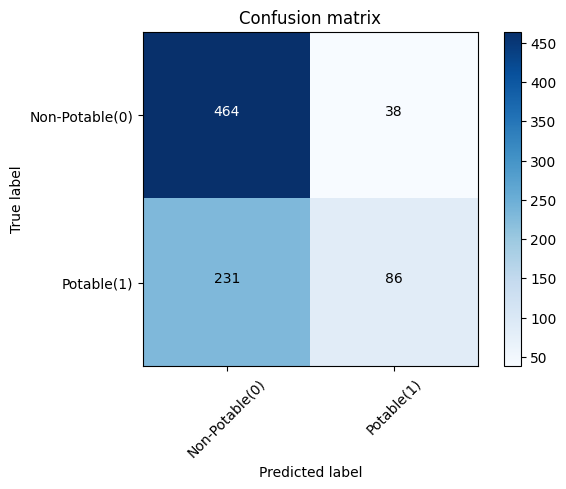

In [ ]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(ytest, prediction_outcome, labels=[0,1])
np.set_printoptions(precision=2)

print (classification_report(ytest, prediction_outcome))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Non-Potable(0)','Potable(1)'],normalize= False,  title='Confusion matrix')

Accuracy Evaluation

In [ ]:
print("Train set Accuracy: ", metrics.accuracy_score(ytrain, classifier.predict(xtrain_norm)))
print("Test set Accuracy: ", metrics.accuracy_score(ytest, prediction_outcome))

Train set Accuracy:  0.737077737077737
Test set Accuracy:  0.6715506715506715


Choosing the best possible k value for better accuracy score

In [ ]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):

    #Train Model and Predict
    classifier = KNeighborsClassifier(n_neighbors = n).fit(xtrain_norm,ytrain)
    prediction_outcome=classifier.predict(xtest_norm)
    mean_acc[n-1] = metrics.accuracy_score(ytest, prediction_outcome)


    std_acc[n-1]=np.std(prediction_outcome==ytest)/np.sqrt(prediction_outcome.shape[0])

mean_acc

array([0.5982906 , 0.63614164, 0.60805861, 0.64835165, 0.62759463,
       0.63492063, 0.63247863, 0.63003663, 0.62148962])

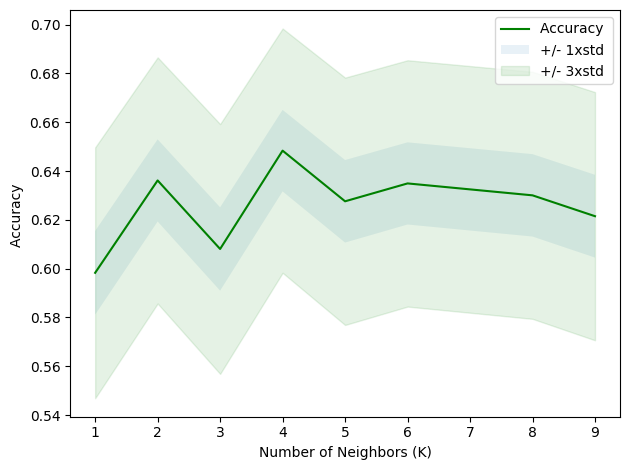

In [ ]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [ ]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)

The best accuracy was with 0.6483516483516484 with k= 4
